In [1]:
import random
import pandas as pd
import pickle
import os
import sys
import warnings
from collections import OrderedDict
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors as rdDesc
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit import RDLogger


import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data


RDKit WARNING: [02:53:11] Enabling RDKit 2019.09.1 jupyter extensions


In [2]:
sys.path.insert(0, './scripts/')
from molecular_graph import ConstructMolecularGraph
from models import Cigin

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## Loading the model

In [4]:
model=Cigin().to(device)
model.load_state_dict(torch.load('weights/cigin.tar'))
model.eval()

Cigin(
  (solute_pass): MessagePassing(
    (U_0): Linear(in_features=90, out_features=40, bias=True)
    (U_1): Linear(in_features=90, out_features=40, bias=True)
    (U_2): Linear(in_features=90, out_features=40, bias=True)
    (M_0): Linear(in_features=80, out_features=40, bias=True)
    (M_1): Linear(in_features=80, out_features=40, bias=True)
    (M_2): Linear(in_features=80, out_features=40, bias=True)
  )
  (solvent_pass): MessagePassing(
    (U_0): Linear(in_features=90, out_features=40, bias=True)
    (U_1): Linear(in_features=90, out_features=40, bias=True)
    (U_2): Linear(in_features=90, out_features=40, bias=True)
    (M_0): Linear(in_features=80, out_features=40, bias=True)
    (M_1): Linear(in_features=80, out_features=40, bias=True)
    (M_2): Linear(in_features=80, out_features=40, bias=True)
  )
  (lstm_solute): LSTM(80, 40)
  (lstm_solvent): LSTM(80, 40)
  (lstm_gather_solute): LSTM(320, 160)
  (lstm_gather_solvent): LSTM(320, 160)
  (first_layer): Linear(in_feature

### Predicting free energy of solvation

In [5]:
solute = 'OCCN'
solvent = 'OCC'
delta_g, interaction_map =  model(solute,solvent)
print("Predicted free energy of solvation: ",str(delta_g.item()))

Predicted free energy of solvation:  -7.81099796295166


### Analysis of interaction map

In [6]:
# Applying min max normalization across the interaction map

min_value = min(interaction_map.flatten())
max_value = max(interaction_map.flatten())
interaction_map = ((interaction_map-min_value)/(max_value-min_value))

### Solute

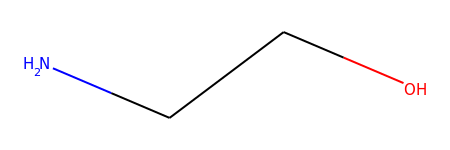

In [7]:
Chem.MolFromSmiles(solute) #OCCN

### Solvent

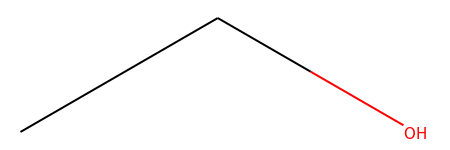

In [8]:
Chem.MolFromSmiles(solvent) #OCC

### Interaction map

Text(0.5, 15.0, 'Solvent')

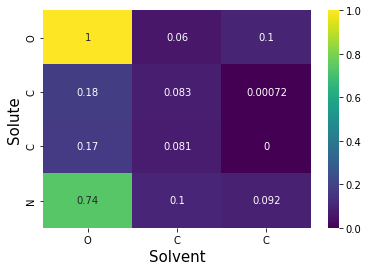

In [9]:
sns.heatmap(interaction_map,annot=True,xticklabels=['O','C','C'],yticklabels=['O','C','C','N'],cmap='viridis')
plt.ylabel('Solute',size='15')
plt.xlabel('Solvent',size='15')